<a href="https://colab.research.google.com/github/SepehrSepehri/DataForGoodWR/blob/main/DataForGood_v4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting and Analyzing Twitter Data

## **Accessing web APIs**
<br>

**Background:**


*Application Program Interfaces (APIs) are sets of protocols that govern interactions between sites and users.*

APIs are similar to web browsers but Web APIs manage and organize data.

For public APIs, many sites only allow authorized users:
*Twitter, Facebook, Instagram, Github, etc.*

<br>



**Twitter APIs:**

To connect to Twitter's APIs, users need a consumer key and consumer secret, which you can get by creating a Twitter app.



Creating a Twitter App
1. Log in to your [Twitter.com](https://) account
2. Go to [apps.twitter.com](https://)
3. Select: Create New App

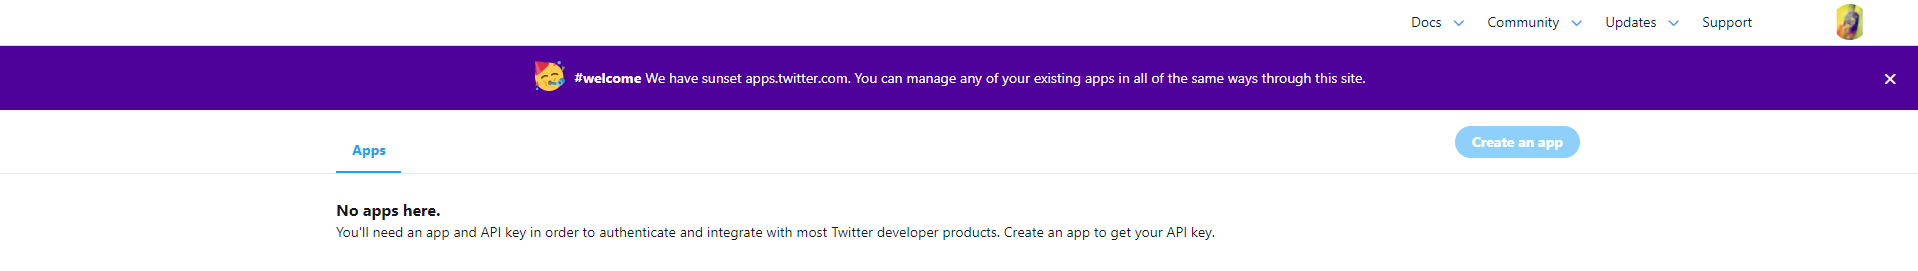

Complete the fields (important: Callback URL must be exact)


*   Name: twitter_app
*   Description: something about analyzing Twitter data
*   Website: https://twitter.com/{{you_screen_name}}
*   Callback URL: http://127.0.0.1:1410

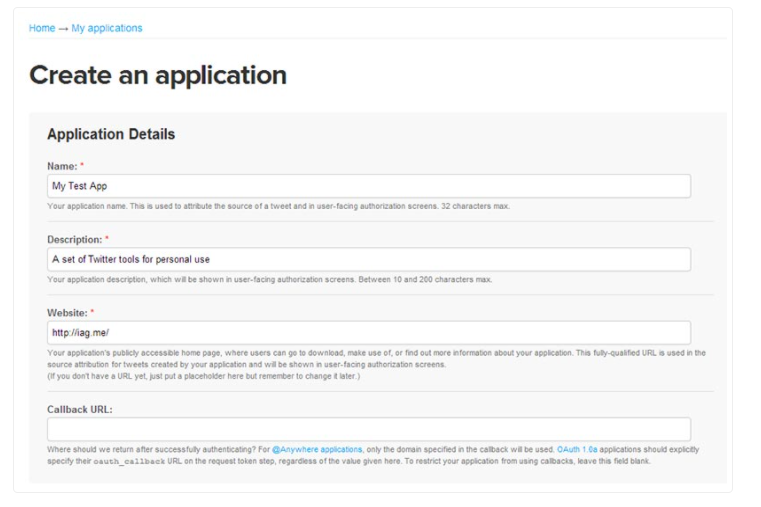

Copy the keys

*   Click Create your Twitter application
*   Select Keys and Access Tokens tab
*   Copy the Consumer Key (API Key) and Consumer Secret (API Secret) and paste into R script

In [6]:
consumer_key= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_token_secret= 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'

consumer_key = 'OUAQvVlaTvZN5uR3sioOnybpm'
consumer_secret = '5HEPfmgNw7sJi4eXqngNsPxkM1SsYRiAuh7C1UoZItT59tuYHO'

access_token = '972174679443156992-HZ6jOpbrkb9Wg56kE33anz03v4Yo5oP'
access_token_secret = 'Qlm6sPLuE1f6vn2CXOz1ELtJjI6rZ5Pi5bOvo5bdlhISE'


In [7]:
# importing libraries:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [8]:
# connecting to twitter API and Creating API object
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

1. Data exploration

*   Read in the tweets data using pandas
*   Explore the data


Some ideas of things to look for:



*   the dimensions of the data
*   get DataFrame info
*   get summary statistics
*   get the value counts of categoric columns
*   count missing values


In [9]:
# Define Supporting fucntions extract url and hashtags from data:
def url_tweet(url_arg):
  for url in url_arg:
    return url['expanded_url']

    # Sepehr: I defined this function to extract hashtags:
def hashtag_tweet(entity_arg):
  for entity in entity_arg:
    return entity['text']

# Define a fucntion to extract tweets from a twitter account timeline and save them in a Pandas Dataframe:
def tweet(user):
  tweets = tw.Cursor(api.user_timeline,
                   screen_name=user,
                   lang="en",
                   since="2010-01-20",
                   until='2021-02-28').items(10000)


  users_locs = [[tweet.user.id,tweet.created_at,tweet.user.screen_name, tweet.text,
               tweet.user.location,tweet.favorite_count,tweet.retweet_count,
               tweet.user.followers_count,tweet.user.friends_count,
               url_tweet(tweet.entities['urls']),hashtag_tweet(tweet.entities['hashtags']) ] for tweet in tweets]

  tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['ID','created_at', 'screen_name','text', 'location',
                             'favorite_count', 'retweet_count','followers_count','friends_count',
                             'URL','hashtags'])

  # Sepehr: I added entities to the list. We need hashtags from entities
     
  return tweet_text




In [10]:
# Extractin tweets from Waterloo Public Library twitter account:
df_waterloo = tweet("@WaterlooLibrary")
#df_kitchener = tweet("@KitchLibrary")


In [11]:
df_waterloo.shape


(3248, 11)

In [12]:
# Extracting tweets from Kitchener Public Library twitter account:
df_kitchener = tweet("@KitchLibrary")

In [13]:
df_kitchener.shape

(3242, 11)

In [14]:
# Combining (Concatenating) two dataframes
#df = [df_waterloo, df_kitchener]
#concatenate dataframes
df = pd.concat([df_waterloo, df_kitchener])
# reset index
df.reset_index(drop=True, inplace=True)
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags
0,31035514,2021-03-10 18:01:00,WaterlooLibrary,"Viet Thanh Nguyen on Ralph Ellison, Alice Walk...","Waterloo, Ontario, Canada",3,0,8038,7172,https://twitter.com/i/web/status/1369709889682...,None
1,31035514,2021-03-10 15:30:52,WaterlooLibrary,@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...,"Waterloo, Ontario, Canada",0,0,8038,7172,https://twitter.com/i/web/status/1369672108574...,None
2,31035514,2021-03-10 15:29:22,WaterlooLibrary,"RT @WCDSBNewswire: Waterloo families, find out...","Waterloo, Ontario, Canada",0,6,8038,7172,None,None
3,31035514,2021-03-10 15:15:00,WaterlooLibrary,"Our friends at One Book, One Community Waterlo...","Waterloo, Ontario, Canada",2,1,8038,7172,https://twitter.com/i/web/status/1369668114267...,None
4,31035514,2021-03-10 13:07:00,WaterlooLibrary,Kids living in Waterloo Region can also get a ...,"Waterloo, Ontario, Canada",14,7,8038,7172,https://twitter.com/i/web/status/1369635902067...,None


In [15]:
df['text'][1]

'@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @KitchLibrary @rwlibrary Looks like one is being run by @WCDSBNewswire… https://t.co/gMjpUfgZby'

In [16]:
df.iloc[:,3][4]

'Kids living in Waterloo Region can also get a FREE library card with @WaterlooLibrary @KitchLibrary @IdeaXchng… https://t.co/yhPUtkqKyC'

In [17]:
df.iloc[:,9][4]

'https://twitter.com/i/web/status/1369635902067146753'

In [18]:
# number of rows and columns
df.shape

(6490, 11)

In [19]:
# print types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6490 entries, 0 to 6489
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               6490 non-null   int64         
 1   created_at       6490 non-null   datetime64[ns]
 2   screen_name      6490 non-null   object        
 3   text             6490 non-null   object        
 4   location         6490 non-null   object        
 5   favorite_count   6490 non-null   int64         
 6   retweet_count    6490 non-null   int64         
 7   followers_count  6490 non-null   int64         
 8   friends_count    6490 non-null   int64         
 9   URL              4769 non-null   object        
 10  hashtags         857 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 557.9+ KB


In [20]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags
count,6.490000e+03,6490,6490,6490,6490,6490.000000,6490.000000,6490.000000,6490.000000,4769,857
unique,NaN,6487,2,6476,2,NaN,NaN,NaN,NaN,4743,482
top,NaN,2020-06-18 14:05:00,WaterlooLibrary,RT @CityKitchener: Join us for Winter Stories:...,"Waterloo, Ontario, Canada",NaN,NaN,NaN,NaN,http://NYTimes.com,85Queen
freq,NaN,2,3248,4,3248,NaN,NaN,NaN,NaN,6,42
first,NaN,2019-01-23 16:08:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-03-10 18:27:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.278950e+08,NaN,NaN,NaN,NaN,4.618952,49.452696,10251.926656,5074.440986,NaN,NaN
std,1.970568e+08,NaN,NaN,NaN,NaN,15.842151,1727.248945,2216.138974,2099.660870,NaN,NaN
min,3.103551e+07,NaN,NaN,NaN,NaN,0.000000,0.000000,8038.000000,2973.000000,NaN,NaN
25%,3.103551e+07,NaN,NaN,NaN,NaN,0.000000,0.000000,8038.000000,2973.000000,NaN,NaN


In [21]:
df['location'].value_counts()

Waterloo, Ontario, Canada     3248
Kitchener, Ontario, Canada    3242
Name: location, dtype: int64

In [22]:
df.isnull().sum()

ID                    0
created_at            0
screen_name           0
text                  0
location              0
favorite_count        0
retweet_count         0
followers_count       0
friends_count         0
URL                1721
hashtags           5633
dtype: int64

# Dealing with text data

Pandas has many methods for working with text data. We can use these to create features from our tweet text.

A full list of these string methods can be found at: https://pandas.pydata.org/pandas-docs/stable/text.html

*   Create a new column called num_chars that is the number of characters in each tweet
*   Create a new column called num_words that is a count of how many words in each tweet
*   Create a new column called num_ats that is a count of how many @ symbols in each

*   Noise cleaning: Eliminating meaningless and repetitive words, which are not helping in concluding the result such as RT-@-#-URLs-#-usernames, etc.
*   Stop-Words Removal: The next important step is removing the stop words. These words are usually meaningless and carry no or little importance in a sentence. Removing these words makes the sentence simpler. Examples of such words include the, a, an, as, he, she, etc. Stop words are more likely to occur repeatedly into the review of users
*   Stemming: Alternate word suffixes and decrease the words’ length to their root forms such as changing "clean", "cleaner", "cleaning", and "cleaned" to the base form of "clean".

















In [23]:
# Sepehr: Remove retweet indicator such as  RT @WaterlooLibrary:
import re
#Extract retweet from the text and save it in 'retween' column:
df['retweet']=df['text'].str.findall(r'RT (@\w+):')

# remove retweet from the text:
def remove_RT(txt):
    return re.sub(r'RT @\w+:',r'', txt) 
df['text']=  [remove_RT(tweet) for tweet in  df['text']]
df['text']

0       Viet Thanh Nguyen on Ralph Ellison, Alice Walk...
1       @WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...
2        Waterloo families, find out what great resour...
3       Our friends at One Book, One Community Waterlo...
4       Kids living in Waterloo Region can also get a ...
                              ...                        
6485    @carrie_m 🙋🏽‍♀️ I do! Thanks for sharing this,...
6486     Coming up next in our winter Film Series at @...
6487    ❄️❄️❄️❄️❄️❄️❄️\n❄️🚗 beep beep 🚗❄️\n❄️❄️❄️❄️❄️❄...
6488     Open Sesame will be there, selling Adam Nayma...
6489     We're thrilled to announce three keynote spea...
Name: text, Length: 6490, dtype: object

In [24]:
# number of characters
df['num_chars'] = df['text'].str.len()
# number of words
df['num_words'] = df['text'].str.count(' ') + 1
# number of "@" symbols
df['num_ats'] = df['text'].str.count('@')

In [25]:
df['tokens'] = [m.lower() for m in df['text']]
df.head()



,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens
0,31035514,2021-03-10 18:01:00,WaterlooLibrary,"Viet Thanh Nguyen on Ralph Ellison, Alice Walk...","Waterloo, Ontario, Canada",3,0,8038,7172,https://twitter.com/i/web/status/1369709889682...,None,[],140,19,0,"viet thanh nguyen on ralph ellison, alice walk..."
1,31035514,2021-03-10 15:30:52,WaterlooLibrary,@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...,"Waterloo, Ontario, Canada",0,0,8038,7172,https://twitter.com/i/web/status/1369672108574...,None,[],139,14,6,@wcdsbchristine @wcdsbnewswire @aliciawcdsb @k...
2,31035514,2021-03-10 15:29:22,WaterlooLibrary,"Waterloo families, find out what great resour...","Waterloo, Ontario, Canada",0,6,8038,7172,None,None,[@WCDSBNewswire],122,20,0,"waterloo families, find out what great resour..."
3,31035514,2021-03-10 15:15:00,WaterlooLibrary,"Our friends at One Book, One Community Waterlo...","Waterloo, Ontario, Canada",2,1,8038,7172,https://twitter.com/i/web/status/1369668114267...,None,[],140,18,0,"our friends at one book, one community waterlo..."
4,31035514,2021-03-10 13:07:00,WaterlooLibrary,Kids living in Waterloo Region can also get a ...,"Waterloo, Ontario, Canada",14,7,8038,7172,https://twitter.com/i/web/status/1369635902067...,None,[],135,17,3,kids living in waterloo region can also get a ...


In [26]:
# importing libraries
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
import pandas as pd
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
df2 = df
df['text'].iloc[1]

'@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @KitchLibrary @rwlibrary Looks like one is being run by @WCDSBNewswire… https://t.co/gMjpUfgZby'

In [28]:
# Definig a function fot removing urls from the text
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [29]:
# Removing the urls
all_tweets_no_urls = [remove_url(tweet) for tweet in df2.iloc[:,3]]
all_tweets_no_urls[:5]

['Viet Thanh Nguyen on Ralph Ellison Alice Walker and Tintin 10 rapidfire book recommendations from the Pulitzer',
 'WCDSBChristine WCDSBNewswire AliciaWcdsb KitchLibrary rwlibrary Looks like one is being run by WCDSBNewswire',
 'Waterloo families find out what great resources are available to you virtually at the Waterloo Public Library WCDSBs',
 'Our friends at One Book One Community Waterloo Region are celebrating their 20th anniversary Theyre counting dow',
 'Kids living in Waterloo Region can also get a FREE library card with WaterlooLibrary KitchLibrary IdeaXchng']

In [30]:
 stop_words = set(stopwords.words('english'))
# View a few words from the set
list(stop_words)[0:10]

['ourselves',
 'which',
 'aren',
 'it',
 "didn't",
 'now',
 'or',
 'after',
 'down',
 'because']

In [31]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
#words_in_tweet[:2]
#words_in_tweet[1]

In [32]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

#tweets_nsw[0]
tweets_nsw_join = [' '.join(tweet) for tweet in tweets_nsw]
tweets_nsw_join[:5]

['viet thanh nguyen ralph ellison alice walker tintin 10 rapidfire book recommendations pulitzer',
 'wcdsbchristine wcdsbnewswire aliciawcdsb kitchlibrary rwlibrary looks like one run wcdsbnewswire',
 'waterloo families find great resources available virtually waterloo public library wcdsbs',
 'friends one book one community waterloo region celebrating 20th anniversary theyre counting dow',
 'kids living waterloo region also get free library card waterloolibrary kitchlibrary ideaxchng']

In [33]:
# len(tweets_nsw_join) 6483
df['Clean_text'] = tweets_nsw_join
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,Clean_text
0,31035514,2021-03-10 18:01:00,WaterlooLibrary,"Viet Thanh Nguyen on Ralph Ellison, Alice Walk...","Waterloo, Ontario, Canada",3,0,8038,7172,https://twitter.com/i/web/status/1369709889682...,None,[],140,19,0,"viet thanh nguyen on ralph ellison, alice walk...",viet thanh nguyen ralph ellison alice walker t...
1,31035514,2021-03-10 15:30:52,WaterlooLibrary,@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...,"Waterloo, Ontario, Canada",0,0,8038,7172,https://twitter.com/i/web/status/1369672108574...,None,[],139,14,6,@wcdsbchristine @wcdsbnewswire @aliciawcdsb @k...,wcdsbchristine wcdsbnewswire aliciawcdsb kitch...
2,31035514,2021-03-10 15:29:22,WaterlooLibrary,"Waterloo families, find out what great resour...","Waterloo, Ontario, Canada",0,6,8038,7172,None,None,[@WCDSBNewswire],122,20,0,"waterloo families, find out what great resour...",waterloo families find great resources availab...
3,31035514,2021-03-10 15:15:00,WaterlooLibrary,"Our friends at One Book, One Community Waterlo...","Waterloo, Ontario, Canada",2,1,8038,7172,https://twitter.com/i/web/status/1369668114267...,None,[],140,18,0,"our friends at one book, one community waterlo...",friends one book one community waterloo region...
4,31035514,2021-03-10 13:07:00,WaterlooLibrary,Kids living in Waterloo Region can also get a ...,"Waterloo, Ontario, Canada",14,7,8038,7172,https://twitter.com/i/web/status/1369635902067...,None,[],135,17,3,kids living in waterloo region can also get a ...,kids living waterloo region also get free libr...


In [34]:
# stem
tokens = ['we', 'all', 'liked', 'the', 'movie']
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
[ps.stem(x) for x in tokens]


['we', 'all', 'like', 'the', 'movi']

In [35]:
stemmer = PorterStemmer()
tweets_clean = [[stemmer.stem(x) for x in m] for m in tweets_nsw]
tweets_clean_join = [' '.join(tweet) for tweet in tweets_clean]
tweets_clean_join[:5]

['viet thanh nguyen ralph ellison alic walker tintin 10 rapidfir book recommend pulitz',
 'wcdsbchristin wcdsbnewswir aliciawcdsb kitchlibrari rwlibrari look like one run wcdsbnewswir',
 'waterloo famili find great resourc avail virtual waterloo public librari wcdsb',
 'friend one book one commun waterloo region celebr 20th anniversari theyr count dow',
 'kid live waterloo region also get free librari card waterloolibrari kitchlibrari ideaxchng']

**Sentiment Analysis with positive/negative words**

We can determine how many positive and negative words are being used in each tweet by comparing them to a predefined list of words.                             
This helps us in using external data to help build features.

We borrowed our list of pos/neg words from this study: 
https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html


In [36]:
pos_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/positive-words.txt', skiprows=35, names=['words'])
pos_words = pos_words['words'].values.tolist()

#pos_words

In [37]:
neg_words = pd.read_csv('https://raw.githubusercontent.com/nick-wcd/cbc/master/negative-words.txt', skiprows=35, names=['words'])
neg_words = neg_words['words'].values.tolist()

#neg_words

In [38]:
len(neg_words)

4783

In [39]:
def count_words(tweet, words):
    count = 0
    for word in tweet.split():
        if word in words:
            count += 1
    return count

In [40]:
# count the number of positive and negative words in each tweet
df['pos_count'] = df['Clean_text'].apply(count_words, words=pos_words)
df['neg_count'] = df['Clean_text'].apply(count_words, words=neg_words)

In [41]:
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,Clean_text,pos_count,neg_count
0,31035514,2021-03-10 18:01:00,WaterlooLibrary,"Viet Thanh Nguyen on Ralph Ellison, Alice Walk...","Waterloo, Ontario, Canada",3,0,8038,7172,https://twitter.com/i/web/status/1369709889682...,None,[],140,19,0,"viet thanh nguyen on ralph ellison, alice walk...",viet thanh nguyen ralph ellison alice walker t...,1,0
1,31035514,2021-03-10 15:30:52,WaterlooLibrary,@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...,"Waterloo, Ontario, Canada",0,0,8038,7172,https://twitter.com/i/web/status/1369672108574...,None,[],139,14,6,@wcdsbchristine @wcdsbnewswire @aliciawcdsb @k...,wcdsbchristine wcdsbnewswire aliciawcdsb kitch...,1,0
2,31035514,2021-03-10 15:29:22,WaterlooLibrary,"Waterloo families, find out what great resour...","Waterloo, Ontario, Canada",0,6,8038,7172,None,None,[@WCDSBNewswire],122,20,0,"waterloo families, find out what great resour...",waterloo families find great resources availab...,2,0
3,31035514,2021-03-10 15:15:00,WaterlooLibrary,"Our friends at One Book, One Community Waterlo...","Waterloo, Ontario, Canada",2,1,8038,7172,https://twitter.com/i/web/status/1369668114267...,None,[],140,18,0,"our friends at one book, one community waterlo...",friends one book one community waterloo region...,0,0
4,31035514,2021-03-10 13:07:00,WaterlooLibrary,Kids living in Waterloo Region can also get a ...,"Waterloo, Ontario, Canada",14,7,8038,7172,https://twitter.com/i/web/status/1369635902067...,None,[],135,17,3,kids living in waterloo region can also get a ...,kids living waterloo region also get free libr...,1,0


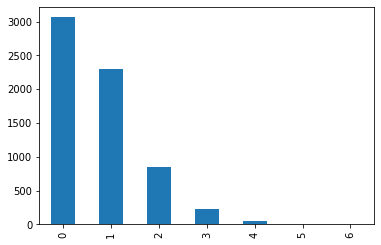

In [42]:
df['pos_count'].value_counts().plot(kind='bar')

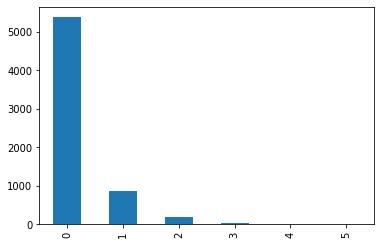

In [43]:
df['neg_count'].value_counts().plot(kind='bar')

# Sepehr: 
---
#Further data cleaning:
*   Removing emojies
*   Removing punctuations
*   Tokenization
*   Lemmatization
      * Part of Speech Tagging
      * WordNet
---



# Exploratory Data Analysis (EDA):

*   Words Frequency Distributions
*   wordcloud
*   Sentiment Analysis

*   Hashtags in positive VS tweets negative tweets


---

# Topic Modeling
---


In [44]:
# Sepehr: Cleaning data:
import re



In [45]:
df['text1']=df['text']

'Kids living in Waterloo Region can also get a FREE library card with @WaterlooLibrary @KitchLibrary @IdeaXchng… https://t.co/yhPUtkqKyC'

In [47]:
# Definig a function for removing urls from the text
#def remove_url(txt):
#    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

def remove_url(text):
    return re.sub(r'https?://.*\b','',text)

df['text1']=df['text1'].apply(lambda x: remove_url(x))

In [272]:
df['text'].iloc[4]

'Kids living in Waterloo Region can also get a FREE library card with @WaterlooLibrary @KitchLibrary @IdeaXchng… https://t.co/yhPUtkqKyC'

In [273]:
df['text1'].iloc[4]

'Kids living in Waterloo Region can also get a FREE library card with WaterlooLibrary KitchLibrary IdeaXchng… '

In [271]:
# Removing emojis from the text
# The following function revomes the emojis from text. 'apply' function should be used for each text.
# Apply function: Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). 

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['text1']=df['text1'].apply(lambda x: remove_emoji(x))

#Full list of emojies: https://unicode.org/emoji/charts/full-emoji-list.html

In [50]:
df['text'].iloc[6417]

"@CityKitchener @Centre_Square We're grateful to this community and @CityKitchener for the continued support! Strong… https://t.co/OKbmHbwaMf"

In [51]:
df['text1'].iloc[6417]

"@CityKitchener @Centre_Square We're grateful to this community and @CityKitchener for the continued support! Strong… "

**string** is a pre-built module in python for workingwith strings

In [52]:
# Removing punctuations from the text
# We can find a list of punctuations in the string module
import string
string.punctuation
def remove_punc(text):
    return text.translate(text.maketrans('','',string.punctuation))
df['text1']=df['text1'].apply(lambda x: remove_punc(x))


In [53]:
df['text'].iloc[0]

'Viet Thanh Nguyen on Ralph Ellison, Alice Walker, and Tintin : 10 rapid-fire book recommendations from the Pulitzer… https://t.co/EWYITFOPRw'

In [54]:
df['text1'].iloc[0]

'Viet Thanh Nguyen on Ralph Ellison Alice Walker and Tintin  10 rapidfire book recommendations from the Pulitzer… '

After removing unnecessary characters from the text, we can tokenize it.

**Tokenization** is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

In [55]:
# Tokenizing by using nltk work tokenizer:
from nltk import word_tokenize
from nltk.corpus import stopwords

df['tokenized']=df['text1'].apply(word_tokenize)
stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])

df.head()


,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,Clean_text,pos_count,neg_count,text1,tokenized
0,31035514,2021-03-10 18:01:00,WaterlooLibrary,"Viet Thanh Nguyen on Ralph Ellison, Alice Walk...","Waterloo, Ontario, Canada",3,0,8038,7172,https://twitter.com/i/web/status/1369709889682...,None,[],140,19,0,"viet thanh nguyen on ralph ellison, alice walk...",viet thanh nguyen ralph ellison alice walker t...,1,0,Viet Thanh Nguyen on Ralph Ellison Alice Walke...,"[Viet, Thanh, Nguyen, Ralph, Ellison, Alice, W..."
1,31035514,2021-03-10 15:30:52,WaterlooLibrary,@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...,"Waterloo, Ontario, Canada",0,0,8038,7172,https://twitter.com/i/web/status/1369672108574...,None,[],139,14,6,@wcdsbchristine @wcdsbnewswire @aliciawcdsb @k...,wcdsbchristine wcdsbnewswire aliciawcdsb kitch...,1,0,WCDSBChristine WCDSBNewswire AliciaWcdsb Kitch...,"[WCDSBChristine, WCDSBNewswire, AliciaWcdsb, K..."
2,31035514,2021-03-10 15:29:22,WaterlooLibrary,"Waterloo families, find out what great resour...","Waterloo, Ontario, Canada",0,6,8038,7172,None,None,[@WCDSBNewswire],122,20,0,"waterloo families, find out what great resour...",waterloo families find great resources availab...,2,0,Waterloo families find out what great resourc...,"[Waterloo, families, find, great, resources, a..."
3,31035514,2021-03-10 15:15:00,WaterlooLibrary,"Our friends at One Book, One Community Waterlo...","Waterloo, Ontario, Canada",2,1,8038,7172,https://twitter.com/i/web/status/1369668114267...,None,[],140,18,0,"our friends at one book, one community waterlo...",friends one book one community waterloo region...,0,0,Our friends at One Book One Community Waterloo...,"[Our, friends, One, Book, One, Community, Wate..."
4,31035514,2021-03-10 13:07:00,WaterlooLibrary,Kids living in Waterloo Region can also get a ...,"Waterloo, Ontario, Canada",14,7,8038,7172,https://twitter.com/i/web/status/1369635902067...,None,[],135,17,3,kids living in waterloo region can also get a ...,kids living waterloo region also get free libr...,1,0,Kids living in Waterloo Region can also get a ...,"[Kids, living, Waterloo, Region, also, get, FR..."


## Lemmatization
**The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.**

***Stemming*** usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 
***Lemmatization*** usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. 

Example: 
token saw:
stemming might return just s, whereas 

lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun.

Resource: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

### Part of Speach (POS) tagging
part-of-speech tagging, takes a sequence of words and assignes each word a part of speech like NOUN or VERB

In [57]:
# Downloading and importing wordnet
# downloading wordet
nltk.download('wordnet')

# downloading averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger')

# importing wordnet from nltk.corpus
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [58]:
# defining supporting functions to get the POS and and change them tags of wordnet
def defualt_pos_tagger (token):
    tags=nltk.pos_tag(token)
    return tags

df['defualt_postag']=df['tokenized'].apply(defualt_pos_tagger)

***WordNet®*** is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of conceptual-semantic and lexical relations.
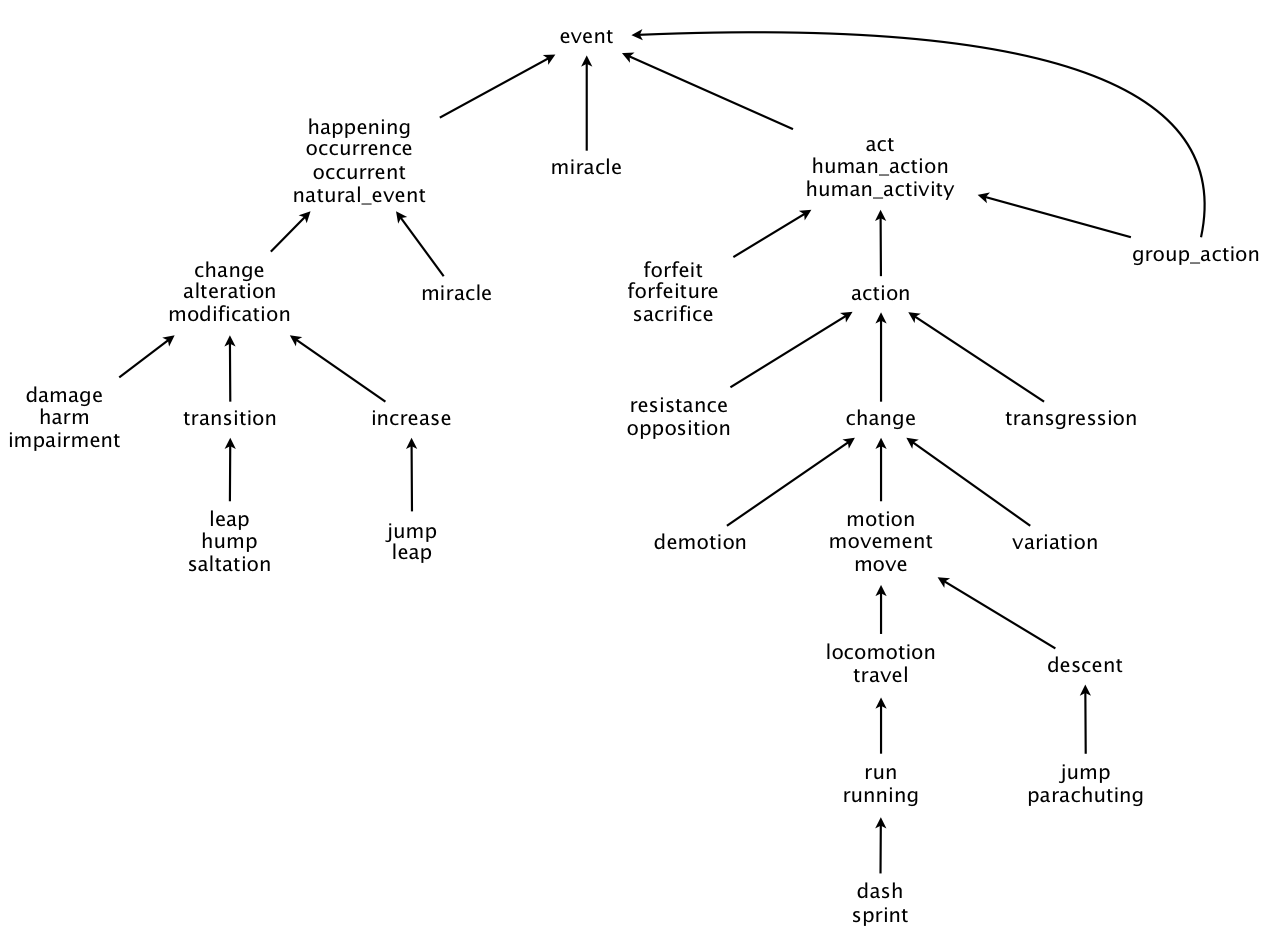
Resource: https://wordnet.princeton.edu/

In [59]:
# Defining supporting function for changing POS of NLTK to POS of Wordnet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [60]:
# Extracting POS of tokens
df['wordnet_pos'] = df['defualt_postag'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,Clean_text,pos_count,neg_count,text1,tokenized,defualt_postag,wordnet_pos
0,31035514,2021-03-10 18:01:00,WaterlooLibrary,"Viet Thanh Nguyen on Ralph Ellison, Alice Walk...","Waterloo, Ontario, Canada",3,0,8038,7172,https://twitter.com/i/web/status/1369709889682...,None,[],140,19,0,"viet thanh nguyen on ralph ellison, alice walk...",viet thanh nguyen ralph ellison alice walker t...,1,0,Viet Thanh Nguyen on Ralph Ellison Alice Walke...,"[Viet, Thanh, Nguyen, Ralph, Ellison, Alice, W...","[(Viet, NNP), (Thanh, NNP), (Nguyen, NNP), (Ra...","[(Viet, n), (Thanh, n), (Nguyen, n), (Ralph, n..."
1,31035514,2021-03-10 15:30:52,WaterlooLibrary,@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...,"Waterloo, Ontario, Canada",0,0,8038,7172,https://twitter.com/i/web/status/1369672108574...,None,[],139,14,6,@wcdsbchristine @wcdsbnewswire @aliciawcdsb @k...,wcdsbchristine wcdsbnewswire aliciawcdsb kitch...,1,0,WCDSBChristine WCDSBNewswire AliciaWcdsb Kitch...,"[WCDSBChristine, WCDSBNewswire, AliciaWcdsb, K...","[(WCDSBChristine, NNP), (WCDSBNewswire, NNP), ...","[(WCDSBChristine, n), (WCDSBNewswire, n), (Ali..."
2,31035514,2021-03-10 15:29:22,WaterlooLibrary,"Waterloo families, find out what great resour...","Waterloo, Ontario, Canada",0,6,8038,7172,None,None,[@WCDSBNewswire],122,20,0,"waterloo families, find out what great resour...",waterloo families find great resources availab...,2,0,Waterloo families find out what great resourc...,"[Waterloo, families, find, great, resources, a...","[(Waterloo, NNP), (families, NNS), (find, VBP)...","[(Waterloo, n), (families, n), (find, v), (gre..."
3,31035514,2021-03-10 15:15:00,WaterlooLibrary,"Our friends at One Book, One Community Waterlo...","Waterloo, Ontario, Canada",2,1,8038,7172,https://twitter.com/i/web/status/1369668114267...,None,[],140,18,0,"our friends at one book, one community waterlo...",friends one book one community waterloo region...,0,0,Our friends at One Book One Community Waterloo...,"[Our, friends, One, Book, One, Community, Wate...","[(Our, PRP$), (friends, NNS), (One, CD), (Book...","[(Our, n), (friends, n), (One, n), (Book, n), ..."
4,31035514,2021-03-10 13:07:00,WaterlooLibrary,Kids living in Waterloo Region can also get a ...,"Waterloo, Ontario, Canada",14,7,8038,7172,https://twitter.com/i/web/status/1369635902067...,None,[],135,17,3,kids living in waterloo region can also get a ...,kids living waterloo region also get free libr...,1,0,Kids living in Waterloo Region can also get a ...,"[Kids, living, Waterloo, Region, also, get, FR...","[(Kids, NNS), (living, VBG), (Waterloo, NNP), ...","[(Kids, n), (living, v), (Waterloo, n), (Regio..."


In [61]:
# lemmatizating tokens using WordNetLemmatizer:

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

df['lemmatized_words']=df['wordnet_pos'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

df['lemmatized_text']=[' '.join(map(str,i)) for i in df['lemmatized_words']]
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,Clean_text,pos_count,neg_count,text1,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text
0,31035514,2021-03-10 18:01:00,WaterlooLibrary,"Viet Thanh Nguyen on Ralph Ellison, Alice Walk...","Waterloo, Ontario, Canada",3,0,8038,7172,https://twitter.com/i/web/status/1369709889682...,None,[],140,19,0,"viet thanh nguyen on ralph ellison, alice walk...",viet thanh nguyen ralph ellison alice walker t...,1,0,Viet Thanh Nguyen on Ralph Ellison Alice Walke...,"[Viet, Thanh, Nguyen, Ralph, Ellison, Alice, W...","[(Viet, NNP), (Thanh, NNP), (Nguyen, NNP), (Ra...","[(Viet, n), (Thanh, n), (Nguyen, n), (Ralph, n...","[Viet, Thanh, Nguyen, Ralph, Ellison, Alice, W...",Viet Thanh Nguyen Ralph Ellison Alice Walker T...
1,31035514,2021-03-10 15:30:52,WaterlooLibrary,@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...,"Waterloo, Ontario, Canada",0,0,8038,7172,https://twitter.com/i/web/status/1369672108574...,None,[],139,14,6,@wcdsbchristine @wcdsbnewswire @aliciawcdsb @k...,wcdsbchristine wcdsbnewswire aliciawcdsb kitch...,1,0,WCDSBChristine WCDSBNewswire AliciaWcdsb Kitch...,"[WCDSBChristine, WCDSBNewswire, AliciaWcdsb, K...","[(WCDSBChristine, NNP), (WCDSBNewswire, NNP), ...","[(WCDSBChristine, n), (WCDSBNewswire, n), (Ali...","[WCDSBChristine, WCDSBNewswire, AliciaWcdsb, K...",WCDSBChristine WCDSBNewswire AliciaWcdsb Kitch...
2,31035514,2021-03-10 15:29:22,WaterlooLibrary,"Waterloo families, find out what great resour...","Waterloo, Ontario, Canada",0,6,8038,7172,None,None,[@WCDSBNewswire],122,20,0,"waterloo families, find out what great resour...",waterloo families find great resources availab...,2,0,Waterloo families find out what great resourc...,"[Waterloo, families, find, great, resources, a...","[(Waterloo, NNP), (families, NNS), (find, VBP)...","[(Waterloo, n), (families, n), (find, v), (gre...","[Waterloo, family, find, great, resource, avai...",Waterloo family find great resource available ...
3,31035514,2021-03-10 15:15:00,WaterlooLibrary,"Our friends at One Book, One Community Waterlo...","Waterloo, Ontario, Canada",2,1,8038,7172,https://twitter.com/i/web/status/1369668114267...,None,[],140,18,0,"our friends at one book, one community waterlo...",friends one book one community waterloo region...,0,0,Our friends at One Book One Community Waterloo...,"[Our, friends, One, Book, One, Community, Wate...","[(Our, PRP$), (friends, NNS), (One, CD), (Book...","[(Our, n), (friends, n), (One, n), (Book, n), ...","[Our, friend, One, Book, One, Community, Water...",Our friend One Book One Community Waterloo Reg...
4,31035514,2021-03-10 13:07:00,WaterlooLibrary,Kids living in Waterloo Region can also get a ...,"Waterloo, Ontario, Canada",14,7,8038,7172,https://twitter.com/i/web/status/1369635902067...,None,[],135,17,3,kids living in waterloo region can also get a ...,kids living waterloo region also get free libr...,1,0,Kids living in Waterloo Region can also get a ...,"[Kids, living, Waterloo, Region, also, get, FR...","[(Kids, NNS), (living, VBG), (Waterloo, NNP), ...","[(Kids, n), (living, v), (Waterloo, n), (Regio...","[Kids, live, Waterloo, Region, also, get, FREE...",Kids live Waterloo Region also get FREE librar...


In [200]:
# Sepehr
print(df['text1'].iloc[4])
print(df['Clean_text'].iloc[4])
print(df['lemmatized_text'].iloc[4])

Kids living in Waterloo Region can also get a FREE library card with WaterlooLibrary KitchLibrary IdeaXchng… 
kids living waterloo region also get free library card waterloolibrary kitchlibrary ideaxchng
Kids live Waterloo Region also get FREE library card WaterlooLibrary KitchLibrary IdeaXchng…


# EDA

### Words Frequency Distribution
**FreqDist** tells us the frequency of each vocabulary item in the text. It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. NLTK provides built-in support for them.

In [228]:
# change all words to lowercase:
df['lemmatized_words_clean']= df['lemmatized_words'].apply(lambda x: [word.lower() for word in x ])
df['lemmatized_words_clean'] = df['lemmatized_words_clean'].apply(lambda x: [word for word in x if word not in stop])
df['lemmatized_words_clean']

0       [viet, thanh, nguyen, ralph, ellison, alice, w...
1       [wcdsbchristine, wcdsbnewswire, aliciawcdsb, k...
2       [waterloo, family, find, great, resource, avai...
3       [friend, one, book, one, community, waterloo, ...
4       [kids, live, waterloo, region, also, get, free...
                              ...                        
6485                    [carriem, thanks, share, carriem]
6486    [coming, next, winter, film, series, kitchlibr...
6487                                         [beep, beep]
6488    [open, sesame, sell, adam, naymans, book, btw,...
6489    [thrill, announce, three, keynote, speaker, tr...
Name: lemmatized_words_clean, Length: 6490, dtype: object

In [229]:
# adding all tokes to create a list of tokens
words = df['lemmatized_words_clean']
allwords = []
for wordlist in words:
    allwords += wordlist

In [254]:
from nltk import FreqDist
number_words=100
mostcommon = FreqDist(allwords).most_common(number_words)
print(mostcommon)


[('great', 202), ('u', 163), ('book', 160), ('love', 136), ('wpl', 125), ('happy', 125), ('library', 123), ('kitchlibrary', 119), ('free', 118), ('join', 108), ('share', 95), ('time', 85), ('event', 84), ('good', 82), ('day', 81), ('make', 81), ('welcome', 81), ('get', 80), ('best', 73), ('read', 73), ('virtual', 70), ('one', 68), ('learn', 65), ('thanks', 65), ('community', 62), ('enjoy', 61), ('program', 60), ('today', 57), ('look', 55), ('available', 54), ('author', 54), ('thank', 53), ('amp', 53), ('special', 49), ('help', 48), ('go', 48), ('kid', 48), ('check', 47), ('take', 46), ('annual', 46), ('new', 45), ('15', 45), ('year', 44), ('popular', 44), ('week', 43), ('see', 43), ('wonderful', 42), ('many', 42), ('youre', 42), ('awesome', 40), ('reading', 40), ('novel', 40), ('come', 39), ('like', 39), ('work', 38), ('books', 37), ('know', 37), ('fun', 36), ('list', 36), ('find', 35), ('home', 35), ('tomorrow', 34), ('sure', 34), ('perfect', 33), ('night', 33), ('story', 33), ('win',

### wordcloud
wordcloud is a python library for visulazing the frequency of words
Methods

fit_words(frequencies), Create a word_cloud from words and frequencies.

generate(text), Generate wordcloud from text.

generate_from_frequencies(frequencies[, …]), Create a word_cloud from words and frequencies.

generate_from_text(text), Generate wordcloud from text.

process_text(text) , Splits a long text into words, eliminates the stopwords.

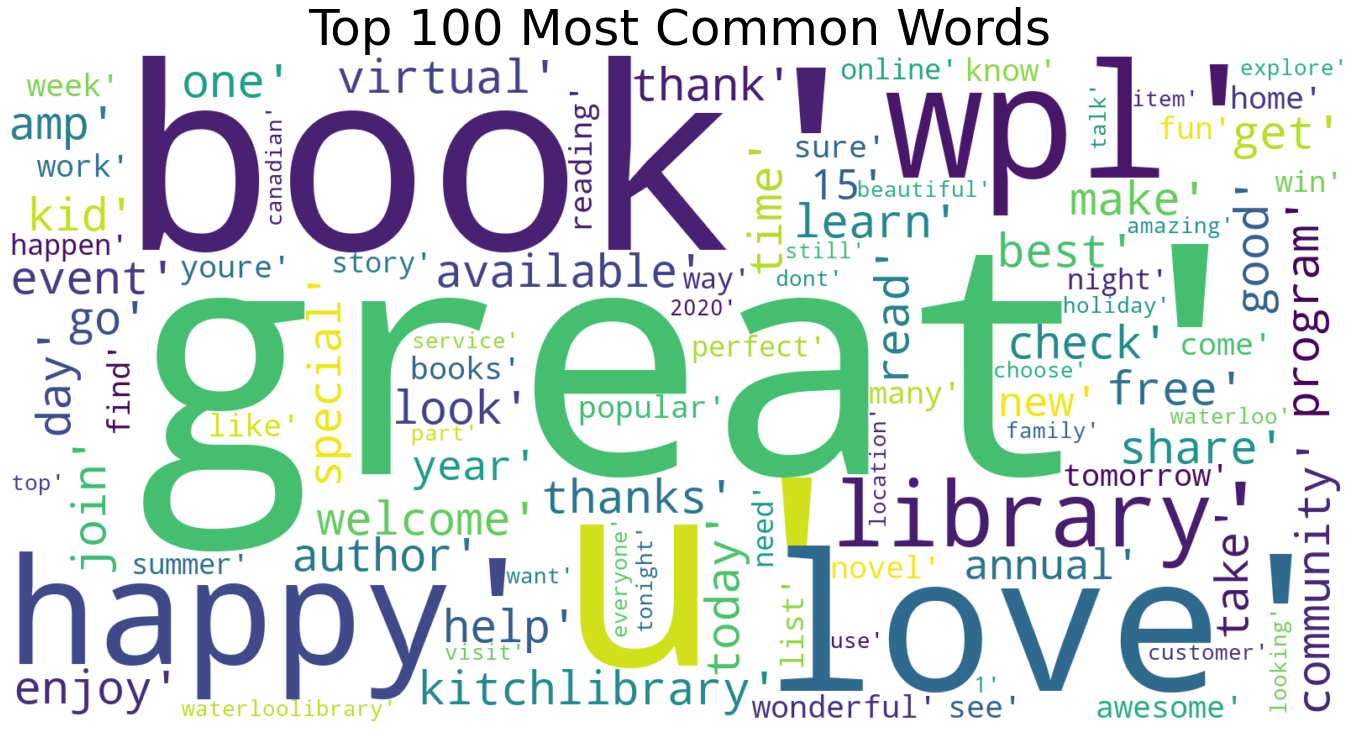

In [255]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(,str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title(f'Top {number_words} Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Most Frequent hashtags 


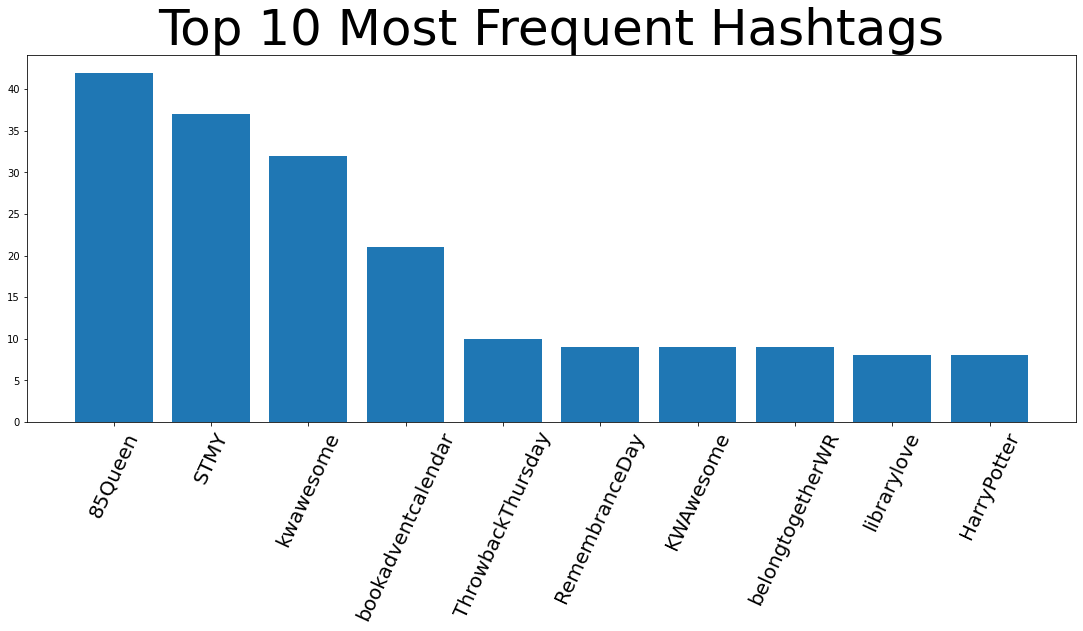

In [232]:
# 
number_hashtags=10
hashtags_freq=df['hashtags'].value_counts()[:number_hashtags]

fig = plt.figure(figsize=(15,6))

plt.title(f'Top {number_hashtags} Most Frequent Hashtags', fontsize=50, )
plt.tight_layout(pad=0)

plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation='65')
plt.show()


100 Most  Frequent Hashtag

### Hashtags for 200 most retweeted tweets

In [233]:
hastags_most_retweeted=df.sort_values('retweet_count',ascending=False).iloc[:200]
hastags_most_retweeted.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,Clean_text,pos_count,neg_count,text1,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text,ngram,lemmatized_words_clean
201,31035514,2021-01-28 14:57:34,WaterlooLibrary,"Today, every view of this video helps create ...","Waterloo, Ontario, Canada",0,113877,8038,7172,None,None,[@Bell_LetsTalk],122,25,0,"today, every view of this video helps create ...",today every view video helps create positive c...,1,0,Today every view of this video helps create p...,"[Today, every, view, video, helps, create, pos...","[(Today, NN), (every, DT), (view, NN), (video,...","[(Today, n), (every, n), (view, n), (video, n)...","[today, every, view, video, help, create, posi...",Today every view video help create positive ch...,NaN,"[today, every, view, video, help, create, posi..."
6130,425118862,2019-03-11 14:44:26,KitchLibrary,"You come at the king, you best not miss https...","Kitchener, Ontario, Canada",0,57950,12470,2973,None,None,[@ManuclearBomb],64,11,0,"you come at the king, you best not miss https...",come king best miss,1,1,You come at the king you best not miss,"[You, come, king, best, miss]","[(You, PRP), (come, VBP), (king, VBG), (best, ...","[(You, n), (come, v), (king, v), (best, a), (m...","[you, come, king, best, miss]",You come king best miss,NaN,"[come, king, best, miss]"
3191,31035514,2019-12-11 16:43:46,WaterlooLibrary,“Well I am telling you there is hope. I have ...,"Waterloo, Ontario, Canada",0,47152,8038,7172,None,None,[@GretaThunberg],122,23,0,“well i am telling you there is hope. i have ...,well telling hope seen itbut come governments ...,1,0,“Well I am telling you there is hope I have s...,"[“, Well, I, telling, hope, I, seen, But, come...","[(“, RB), (Well, RB), (I, PRP), (telling, VBG)...","[(“, r), (Well, r), (I, n), (telling, v), (hop...","[“, well, i, tell, hope, i, see, but, come, go...",“ Well I tell hope I see But come government c...,NaN,"[“, well, tell, hope, see, come, government, c..."
1903,31035514,2020-06-12 13:23:18,WaterlooLibrary,"On our street, we accept all, we love all, an...","Waterloo, Ontario, Canada",0,17208,8038,7172,None,PrideMonth,[@sesamestreet],106,17,0,"on our street, we accept all, we love all, an...",street accept love respect happy pridemonth,3,0,On our street we accept all we love all and w...,"[On, street, accept, love, respect, Happy, Pri...","[(On, IN), (street, NN), (accept, IN), (love, ...","[(On, n), (street, n), (accept, n), (love, n),...","[on, street, accept, love, respect, happy, pri...",On street accept love respect Happy PrideMonth,NaN,"[street, accept, love, respect, happy, pridemo..."
6060,425118862,2019-03-16 15:55:26,KitchLibrary,if you were or are the friendly gent (blue co...,"Kitchener, Ontario, Canada",0,15126,12470,2973,None,None,[@LRBbookshop],124,30,0,if you were or are the friendly gent (blue co...,friendly gent blue coat shop half hour ago lef...,1,0,if you were or are the friendly gent blue coa...,"[friendly, gent, blue, coat, shop, half, hour,...","[(friendly, JJ), (gent, NN), (blue, NN), (coat...","[(friendly, a), (gent, n), (blue, n), (coat, n...","[friendly, gent, blue, coat, shop, half, hour,...",friendly gent blue coat shop half hour ago lea...,NaN,"[friendly, gent, blue, coat, shop, half, hour,..."


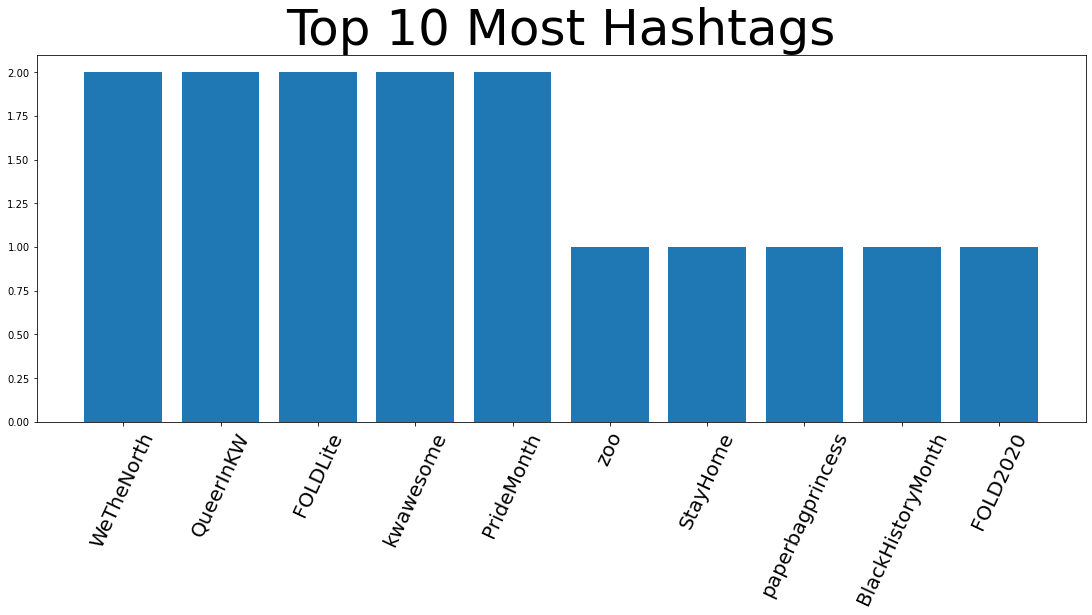

In [234]:
hastags_most_liked=df.sort_values('retweet_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


### Hashtags for 200 most liked tweets

Write a code to extract most frequent hashtags from 200 most liked tweets? 

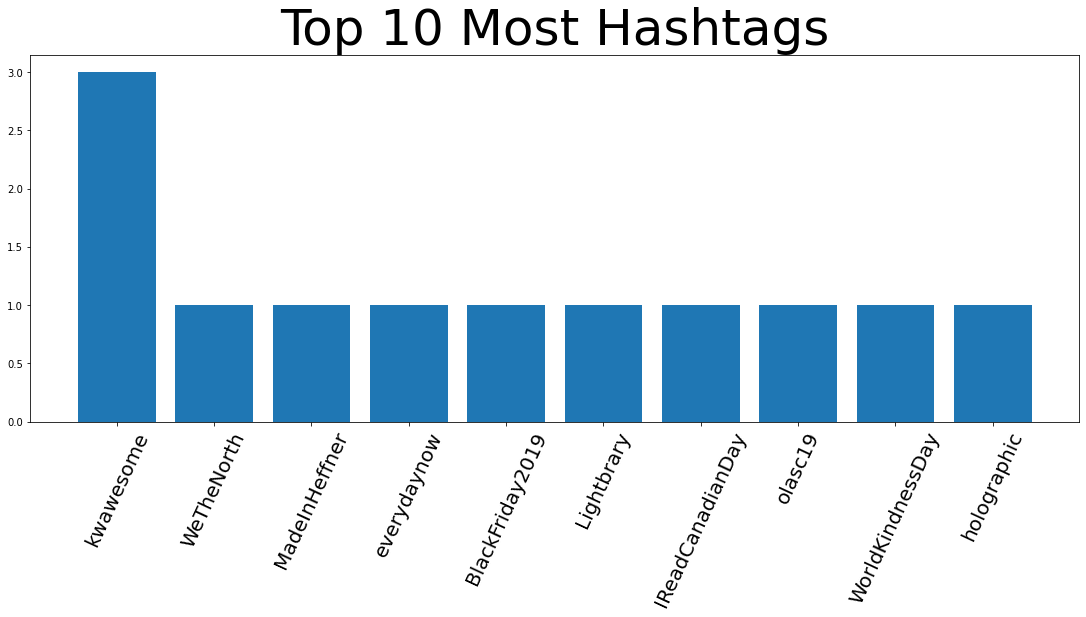

In [235]:
# Solution:

hastags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:200]

hashtags_freq=hastags_most_liked['hashtags'].value_counts()[0:10]

fig = plt.figure(figsize=(15,6))
#plt.axis('off')
plt.title('Top 10 Most Hashtags', fontsize=50, )
plt.tight_layout(pad=0)
#plt.xticks(hashtags_freq.index)
plt.bar(x=hashtags_freq.index,height=hashtags_freq.values)
plt.xticks(fontsize=20, rotation = '65')
plt.show()


## Sentiment Analysis

**Sentiment analysis** is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string.


**TextBlob** is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as **part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation**, and more.

*   PatternAnalyzer - a default classifier that is built on the pattern library
*   NaiveBayesAnalyzer - an NLTK model trained on a movie reviews corpus




In [236]:
from textblob import TextBlob
df['sentiment']= df['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,ID,created_at,screen_name,text,location,favorite_count,retweet_count,followers_count,friends_count,URL,hashtags,retweet,num_chars,num_words,num_ats,tokens,Clean_text,pos_count,neg_count,text1,tokenized,defualt_postag,wordnet_pos,lemmatized_words,lemmatized_text,ngram,lemmatized_words_clean,sentiment
0,31035514,2021-03-10 18:01:00,WaterlooLibrary,"Viet Thanh Nguyen on Ralph Ellison, Alice Walk...","Waterloo, Ontario, Canada",3,0,8038,7172,https://twitter.com/i/web/status/1369709889682...,None,[],140,19,0,"viet thanh nguyen on ralph ellison, alice walk...",viet thanh nguyen ralph ellison alice walker t...,1,0,Viet Thanh Nguyen on Ralph Ellison Alice Walke...,"[Viet, Thanh, Nguyen, Ralph, Ellison, Alice, W...","[(Viet, NNP), (Thanh, NNP), (Nguyen, NNP), (Ra...","[(Viet, n), (Thanh, n), (Nguyen, n), (Ralph, n...","[viet, thanh, nguyen, ralph, ellison, alice, w...",Viet Thanh Nguyen Ralph Ellison Alice Walker T...,<generator object get_ngram at 0x7fc646c780d0>,"[viet, thanh, nguyen, ralph, ellison, alice, w...",0.000000
1,31035514,2021-03-10 15:30:52,WaterlooLibrary,@WCDSBChristine @WCDSBNewswire @AliciaWcdsb @K...,"Waterloo, Ontario, Canada",0,0,8038,7172,https://twitter.com/i/web/status/1369672108574...,None,[],139,14,6,@wcdsbchristine @wcdsbnewswire @aliciawcdsb @k...,wcdsbchristine wcdsbnewswire aliciawcdsb kitch...,1,0,WCDSBChristine WCDSBNewswire AliciaWcdsb Kitch...,"[WCDSBChristine, WCDSBNewswire, AliciaWcdsb, K...","[(WCDSBChristine, NNP), (WCDSBNewswire, NNP), ...","[(WCDSBChristine, n), (WCDSBNewswire, n), (Ali...","[wcdsbchristine, wcdsbnewswire, aliciawcdsb, k...",WCDSBChristine WCDSBNewswire AliciaWcdsb Kitch...,<generator object get_ngram at 0x7fc6475e8f50>,"[wcdsbchristine, wcdsbnewswire, aliciawcdsb, k...",0.000000
2,31035514,2021-03-10 15:29:22,WaterlooLibrary,"Waterloo families, find out what great resour...","Waterloo, Ontario, Canada",0,6,8038,7172,None,None,[@WCDSBNewswire],122,20,0,"waterloo families, find out what great resour...",waterloo families find great resources availab...,2,0,Waterloo families find out what great resourc...,"[Waterloo, families, find, great, resources, a...","[(Waterloo, NNP), (families, NNS), (find, VBP)...","[(Waterloo, n), (families, n), (find, v), (gre...","[waterloo, family, find, great, resource, avai...",Waterloo family find great resource available ...,<generator object get_ngram at 0x7fc646f190d0>,"[waterloo, family, find, great, resource, avai...",0.400000
3,31035514,2021-03-10 15:15:00,WaterlooLibrary,"Our friends at One Book, One Community Waterlo...","Waterloo, Ontario, Canada",2,1,8038,7172,https://twitter.com/i/web/status/1369668114267...,None,[],140,18,0,"our friends at one book, one community waterlo...",friends one book one community waterloo region...,0,0,Our friends at One Book One Community Waterloo...,"[Our, friends, One, Book, One, Community, Wate...","[(Our, PRP$), (friends, NNS), (One, CD), (Book...","[(Our, n), (friends, n), (One, n), (Book, n), ...","[our, friend, one, book, one, community, water...",Our friend One Book One Community Waterloo Reg...,<generator object get_ngram at 0x7fc646f19150>,"[friend, one, book, one, community, waterloo, ...",0.000000
4,31035514,2021-03-10 13:07:00,WaterlooLibrary,Kids living in Waterloo Region can also get a ...,"Waterloo, Ontario, Canada",14,7,8038,7172,https://twitter.com/i/web/status/1369635902067...,None,[],135,17,3,kids living in waterloo region can also get a ...,kids living waterloo region also get free libr...,1,0,Kids living in Waterloo Region can also get a ...,"[Kids, living, Waterloo, Region, also, get, FR...","[(Kids, NNS), (living, VBG), (Waterloo, NNP), ...","[(Kids, n), (living, v), (Waterloo, n), (Regio...","[kids, live, waterloo, region, also, get, free...",Kids live Waterloo Region also get FREE librar...,<generator object get_ngram at 0x7fc646f191d0>,"[kids, live, waterloo, region, also, get, free...",0.268182


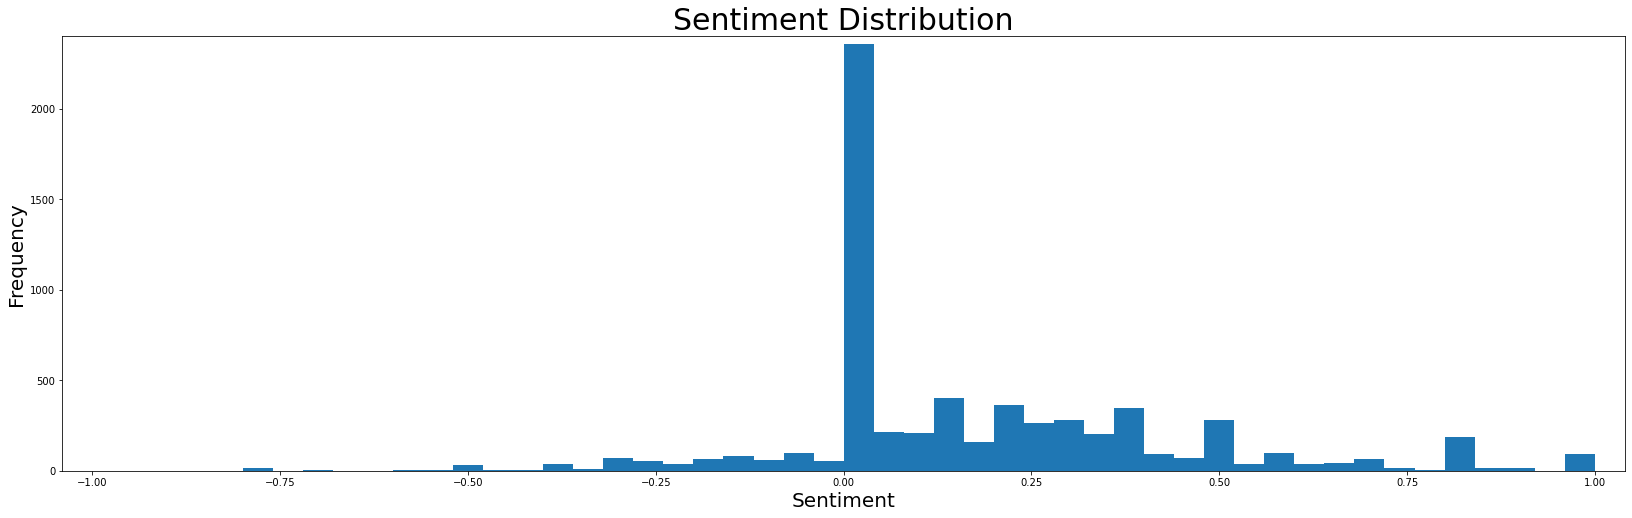

In [239]:
plt.figure(figsize=(28,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

Lets have a look at poitive tweets:

In [244]:
df[df['sentiment']>.8]['text'].iloc[2]

'Thank you @shortfingerbeer for joining us for an awesome night of books and beer! https://t.co/ncHVy1msUI'

And negative tweets

In [245]:
df[df['sentiment']<-.7]['text'].iloc[0]

'The Humboldt crash was a horrible tragedy felt all across Canada. @KalebDahlgren , Humboldt crash survivor, has a n… https://t.co/vz4jYwe69v'

### Most Frequent words with positive sentiment

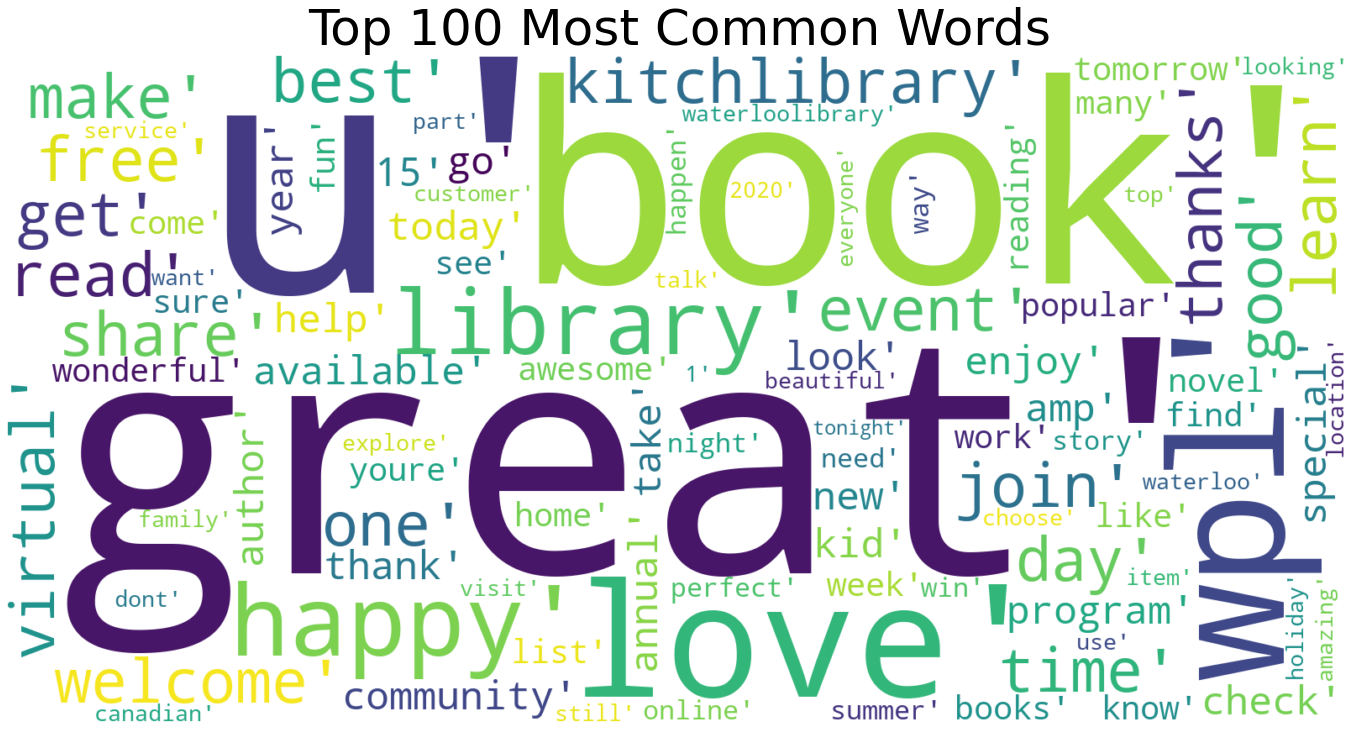

In [253]:
words = df[df['sentiment']>0.33]['lemmatized_words_clean']
allwords = []
for wordlist in words:
    allwords += wordlist

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

### Most Fequent words with negative sentiment

114


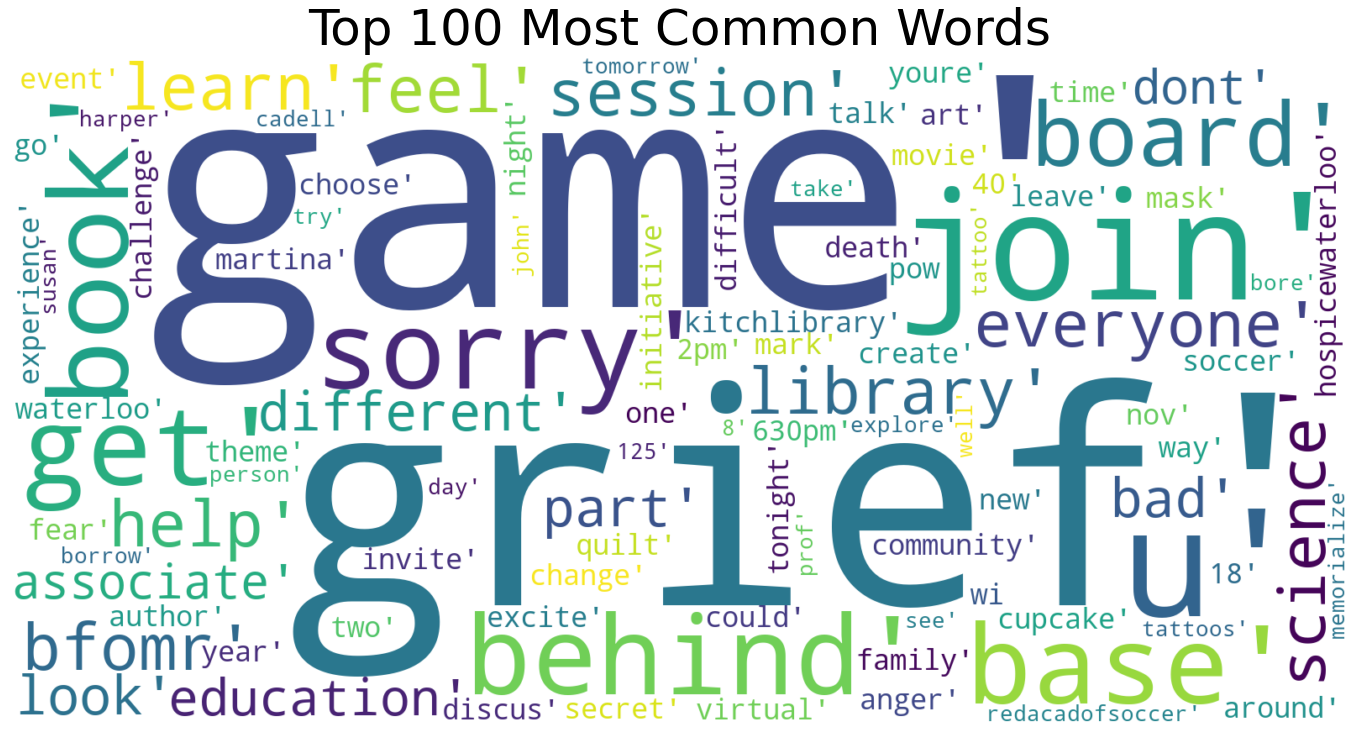

In [248]:
words = df[df['sentiment']<-0.33]['lemmatized_words_clean']
print(len(words))
allwords = []
for wordlist in words:
    allwords += wordlist

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

## Characteristics of most Liked tweets:

In [259]:
print('The average of the number of words',df['num_words'].mean())

print('The average of the number of chars',df['num_chars'].mean())

print('The variance of the number of words',df['num_words'].var())

print('The variance of the number of chars',df['num_chars'].var())


The average of the number of words 18.729429892141756
The average of the number of chars 125.81848998459168
The variance of the number of words 26.02941576369252
The average of the number of chars 747.958727261809


In [249]:
hastags_most_liked=df.sort_values('favorite_count',ascending=False).iloc[:200]

In [261]:
print('The average of the number of words',hastags_most_liked['num_words'].mean())
print('The average of the number of chars',hastags_most_liked['num_chars'].mean())
print('The variance of the number of words',hastags_most_liked['num_words'].var())
print('The variance of the number of chars',hastags_most_liked['num_chars'].var())

The average of the number of words 19.0
The average of the number of chars 125.305
The variance of the number of words 42.311557788944725
The variance of the number of chars 797.7607788944698


In [260]:
hastags_least_liked=df.sort_values('favorite_count',ascending=True).iloc[:200]
print('The average of the number of words',hastags_least_liked['num_words'].mean())
print('The average of the number of chars',hastags_least_liked['num_chars'].mean())
print('The variance of the number of words',hastags_least_liked['num_words'].var())
print('The variance of the number of chars',hastags_least_liked['num_chars'].var())

The average of the number of words 18.615
The average of the number of chars 121.2
The variance of the number of words 33.675150753768825
The variance of the number of chars 887.4371859296485


# Group By

### number of hashtags in a tweet vs how many likes they get

In [266]:
# Lets remove the duplicate twweets
#df.duplicated(subset='text',keep='first')
df.groupby('hashtags').agg({'favorite_count': np.sum}).sort_values('favorite_count', ascending=False)

,favorite_count
hashtags,
kwawesome,710
STMY,247
85Queen,223
2009v2019,132
belongtogetherWR,69
...,...
TuesdayThoughts,0
TurtleTuesday,0
UWaterloo,0


In [ ]:
# normalized the number favorite by the number of retweets. Ask them

## screen_name

In [267]:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean})
screen_name.head(5)

,favorite_count
screen_name,
KitchLibrary,6.269587
WaterlooLibrary,2.971367


In [269]:
screen_name=df.groupby('screen_name').agg({'favorite_count':np.mean,'retweet_count': np.mean, 'followers_count': np.mean, 'friends_count': np.mean})
screen_name.head()

,favorite_count,retweet_count,followers_count,friends_count
screen_name,,,,
KitchLibrary,6.269587,37.982727,12469.944479,2973
WaterlooLibrary,2.971367,60.901478,8038.006158,7172


# Topic Modeling

In [195]:
import pickle
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
#vect = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
#                       token_pattern='(?u)\\b\\w\\w\\w+\\b',)
vect=TfidfVectorizer(ngram_range=(1,2),min_df=10, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(df['lemmatized_text'])

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


In [196]:
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`

# Your code here:
from gensim.models.ldamodel import LdaModel
ldamodel = LdaModel(corpus, num_topics=10, id2word=id_map, passes=25, random_state=34)

In [197]:
def lda_topics():
        
    return ldamodel.show_topics(num_topics=10, num_words=10, log=False, formatted=True)
lda_topics()

[(0,
  '0.026*"book" + 0.020*"read" + 0.019*"love" + 0.016*"kid" + 0.014*"child" + 0.014*"game" + 0.013*"want" + 0.013*"club" + 0.013*"people" + 0.011*"blogger"'),
 (1,
  '0.014*"dont" + 0.014*"miss" + 0.012*"great" + 0.012*"youre" + 0.012*"music" + 0.012*"month" + 0.011*"canadian" + 0.011*"come" + 0.011*"screen" + 0.010*"live"'),
 (2,
  '0.023*"rtraister" + 0.022*"thanks" + 0.021*"share" + 0.018*"thanks share" + 0.017*"mad" + 0.014*"thats" + 0.014*"support" + 0.014*"weve" + 0.014*"kitchener" + 0.014*"kitchlibrary"'),
 (3,
  '0.032*"thanks" + 0.031*"kitchlibrary" + 0.024*"central" + 0.022*"85queen" + 0.019*"central library" + 0.017*"join" + 0.017*"tonight" + 0.015*"new" + 0.015*"come" + 0.014*"elizadice"'),
 (4,
  '0.023*"library" + 0.021*"waterloo" + 0.020*"yes" + 0.018*"international" + 0.017*"know" + 0.016*"card" + 0.014*"region" + 0.013*"magazine" + 0.012*"online" + 0.012*"day"'),
 (5,
  '0.030*"woman" + 0.024*"say" + 0.020*"lisalaflammectv" + 0.019*"shephardm" + 0.017*"book" + 0.0

In [199]:
new_doc= ["Waterloo Public Library will have an event for kids. the event will start at 5 PM and close at 8 PM. It is free for Waterloo comunity."]
def topic_distribution():
    
    # Fit and transform
    xx = vect.transform(new_doc)
    
    # Convert sparse matrix to gensim corpus.
    x_corpus = gensim.matutils.Sparse2Corpus(xx, documents_columns=False)
    
    # Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
    id_map = dict((v, k) for k, v in vect.vocabulary_.items())

    #print()
    #print(ldamodel[x_corpus])
    
    return list(ldamodel[x_corpus])[0] 
topic_distribution()

[(0, 0.02480875),
 (1, 0.024813406),
 (2, 0.024818616),
 (3, 0.024817321),
 (4, 0.77668417),
 (5, 0.024814423),
 (6, 0.02480912),
 (7, 0.024813194),
 (8, 0.024813427),
 (9, 0.024807509)]